# Introduction

This report contains the  presentation and analysis on the 2016 Election Results. Part A contains a Presentation on the election results for all states, including which States were won by Republicans and which states were won by democrats. In this section we highlight the results of the patterns characterized in this years election. To do so we eliminate the focus of geographic space and imply the focus of voting results by eliminating the eyes draw to a natural USA map. In doing so we hope to look towards the voting results and not just the geography. 


Part B, attempts to present a county-wise result for the election.It also attempts to establish a relationship between the average percapita Income of a Region and the Propensity to vote for the republican candidate.The results from two states are analyzed in detail: Michigan and Pennsylvaina. These  states were chosen because the Presidential race was quite close in both these states. A regression analysis of the vote share for Trump vs county Percapita income is conducted for counties in each of these states. 

## Programming Methodology Followed

Part A uses the 'Chorogrid' function to loop draw shape geometries for the states. It then loops through these various states
and plots the results on a colormap.
1) The shapes are pre determined using the 'Chorogrid' module. They are essentially a blank slate that can be filled with data.

2) In doing so we can choose to manipulate the shapes on a whim by both sections using manually gathered election data from the ap poll website and the new york times website. 

3) We chose to focus this attention by using the module as such: to change the way the output of the maps is determined.

4) So we then assign the data to the various shapes and output the maps.


In Part B the following procedure is adopted:

1) County shape files are imported and read using the Cartopy shp reader. These geometries are plotted on the USA map using 
    the add geometries command in cartopy
    
2) For assigning republican and democratic counties a for loop is used on the shapefile.attributes dictionary. The county
   geometries are assigned inside the loop and assigned the facecolor 'red ' for republican and 'blue' for democrat
    
3) Results are analyzed in detail for the state of Michigan. to plot the various counties of Michigan, a for loop is used on the shapefile.attributes dictionary. If the county is in Michigan, it is plotted. If it is republican , then it is 
plotted red, else it is plotted blue. The same procedure is adopted for plotting the ' Republican Voteshare' and the 'Per       Capita Income'
      for the county
4) The same Procedure as in 3) is followed for the state of Pennsylvania
    
5) The seabon packeage and matplotlib packages are used to pot the regression of ' Trump Voteshare' 'Per Capita Income'. 
    The data points are plotted ' red' and 'bllue' using matplotlib and the regression line and confidence interval is plotted 
    using Seaborn
    

# Part A: Data Visualization 

## Importing the modules for 'Chorogrid'

In [1]:
import pandas as pd
from chorogrid import Colorbin
from chorogrid import Chorogrid

### 2016 Election Results Map

This is a basic map of the current results of the 2016 presidential election. This map displays who won each state. Red is the Republican candidate state won, Trump. The blue is the democratic candidate state won. Hillary Clinton. This map helps display the current results of the election before we delve deeper into the voting patterns. 

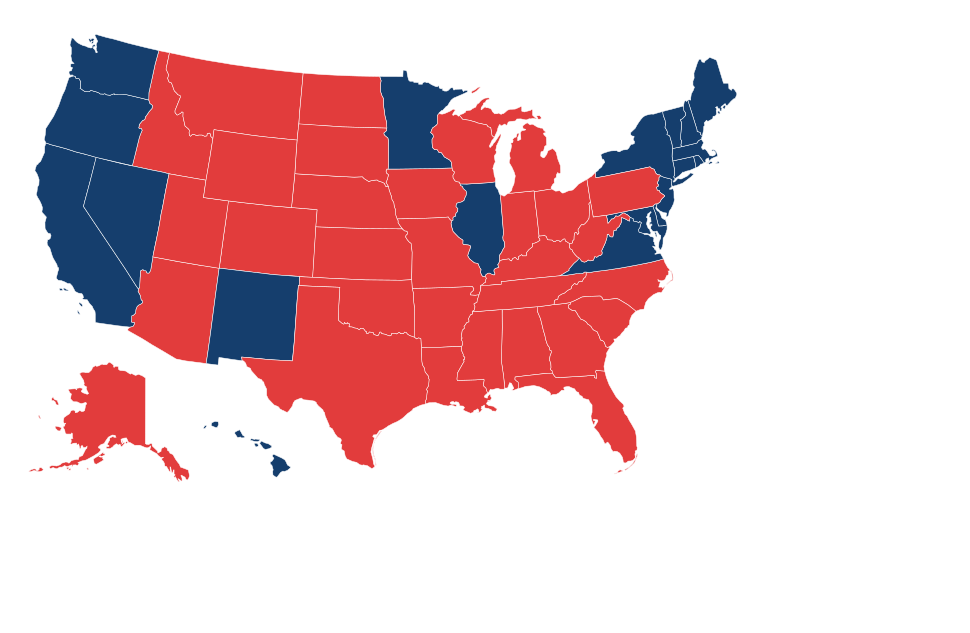

In [2]:
#Election Map
US = ['#153E6D','#E23C3C']

df = pd.read_csv('Voted_by_State.csv')
mybin = Colorbin(df['RepDem'], US, proportional=True,decimals=None)

mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5,'#e0e0e0', '#101010')



states = list(df.ABV)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels



cm = Chorogrid('usa_states.csv', states, colors_by_state)
cm.draw_map(x_column='althex_x', y_column='althex_y', spacing_dict={'margin_right': 1},
           font_colors=font_colors_by_state)
cm.draw_map(spacing_dict={'margin_right': 1}, font_colors=font_colors_by_state)
cm.done(show=True)


### Election results block map
This map displays the same information the map above used, however, it elimnates our eyes attention to geographic princicples by creating a square for each state. This in turn focuses our attention to the information itself and not towards the maps geographic concepts such as: shape, size, and direction that we understand to make up a map. 

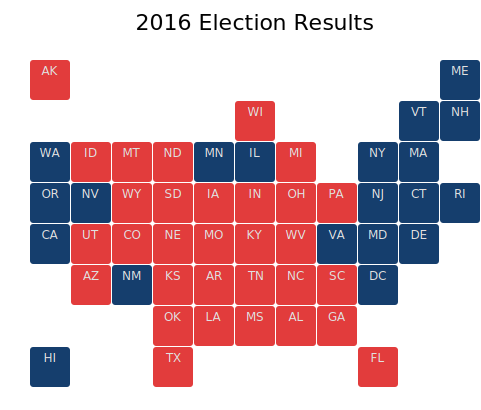

In [3]:
#Election block map
US = ['#153E6D','#E23C3C']

df = pd.read_csv('Voted_by_State.csv')
mybin = Colorbin(df['RepDem'], US, proportional=True,decimals=None)

mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5,'#e0e0e0', '#101010')



states = list(df.ABV)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels



cm = Chorogrid('usa_states.csv', states, colors_by_state)
cm.draw_squares(x_column='althex_x', y_column='althex_y', spacing_dict={'margin_right': 1},
           font_colors=font_colors_by_state)
cm.set_title('2016 Election Results', font_dict={'font-size': 22})
cm.draw_squares(spacing_dict={'margin_right': 1}, font_colors=font_colors_by_state)
cm.done(show=True)

### Multihex Maps

Along with using blocks to show little geographic principle relations between the data. We decided to use multihex in order to display the data in a different view. The data that we gathered was used to highlight the precentages of votes, currently, that voted for each party and resceptivley 

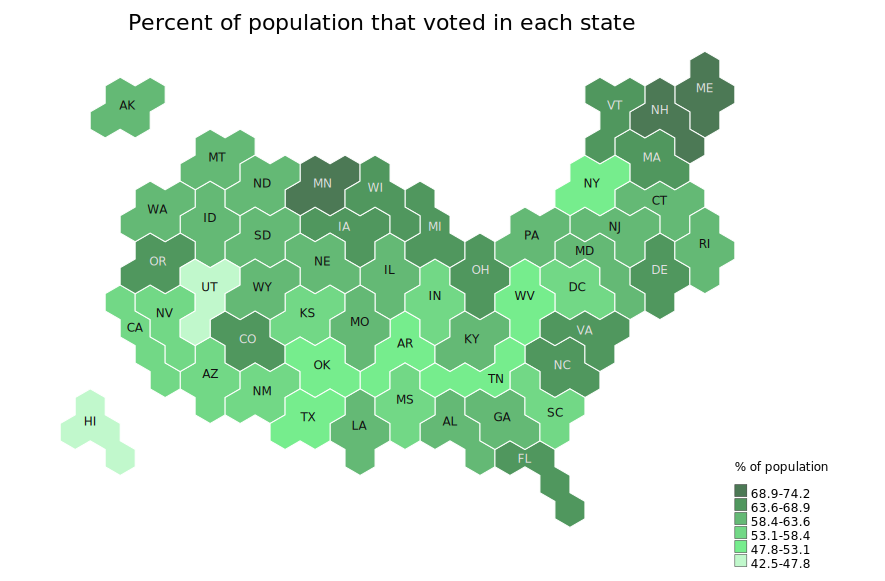

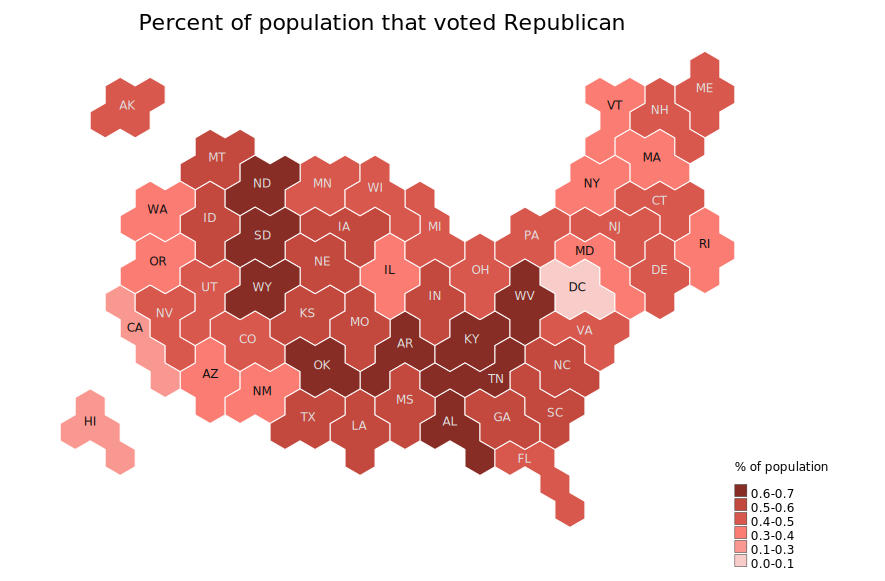

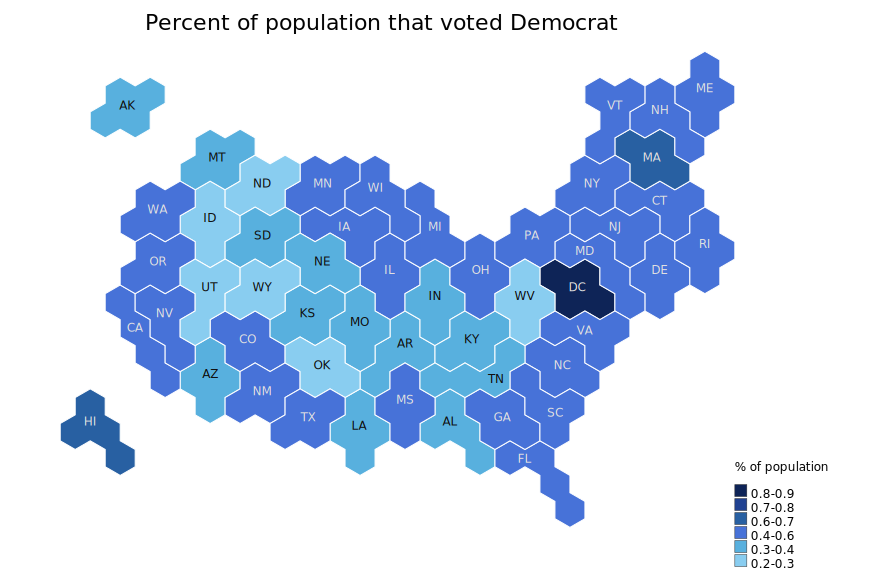

In [4]:
#Percent population that voted per state
DP = ['#C1F8CC', '#76ED8D', '#72D886', '#64B975', '#50975E', '#4C7955']

df = pd.read_csv('Voted_by_State.csv')
mybin = Colorbin(df['Percent_Voted'], DP, proportional=True,decimals=None)

mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5,'#e0e0e0', '#101010')



states = list(df.ABV)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels



cg = Chorogrid('usa_states.csv', states, colors_by_state)
cg.set_title('Percent of population that voted in each state', font_dict={'font-size': 22})
cg.set_legend(legend_colors, legend_labels, title='% of population')
cg.draw_multihex(x_column='althex_x', y_column='althex_y', spacing_dict={'margin_right': 150},
           font_colors=font_colors_by_state)
cg.draw_multihex(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
cg.done(show=True)

#Republican 
DR = ['#F8CCC9', '#F99890', '#FB7C72', '#D8584D', '#C3493F', '#882D25']

df = pd.read_csv('Voted_by_State.csv')
mybin = Colorbin(df['Percent_Voted_Rep'], DR, proportional=True,decimals=None)

mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5,'#e0e0e0', '#101010')



states = list(df.ABV)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels



cv = Chorogrid('usa_states.csv', states, colors_by_state)
cv.set_title('Percent of population that voted Republican', font_dict={'font-size': 22})
cv.set_legend(legend_colors, legend_labels, title='% of population')
cv.draw_multihex(x_column='althex_x', y_column='althex_y', spacing_dict={'margin_right': 150},
           font_colors=font_colors_by_state)
cv.draw_multihex(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
cv.done(show=True)


#Voted Democrat
DB = ['#89CDF0', '#58B0DE', '#4772D8', '#2860A2', '#204292', '#0E2457']

df = pd.read_csv('Voted_by_State.csv')
mybin = Colorbin(df['Percent_Voted_Dem'], DB, proportional=True,decimals=None)

mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5,'#e0e0e0', '#101010')



states = list(df.ABV)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels



cd = Chorogrid('usa_states.csv', states, colors_by_state)
cd.set_title('Percent of population that voted Democrat', font_dict={'font-size': 22})
cd.set_legend(legend_colors, legend_labels, title='% of population')
cd.draw_multihex(x_column='althex_x', y_column='althex_y', spacing_dict={'margin_right': 150},
           font_colors=font_colors_by_state)
cd.draw_multihex(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
cd.done(show=True)

### Hexagonal maps

The data presented in the maps below is in relation to the voter turnout of each Election cycle. For instance the voter turnout in 2012 is 129,085,403 according to University of California, Santa Barbra. The current estimated turnout for voters in 2016 is 132,084,126 according to University of California, Santa Barbra. This data is compared to the votes that did not turnout in each respective year. This is graphed according to the states whose votes were greater than those who did not turnout. This in turn shows that there is a greater number of ststaes that had less voter eligible turnout than those that voted. This is only differenced in states whose votes were closer together than those who werent, swing states. 

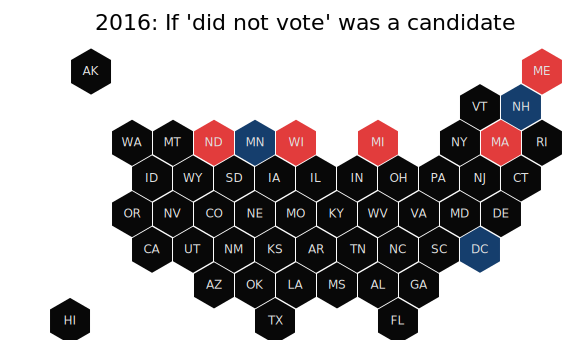

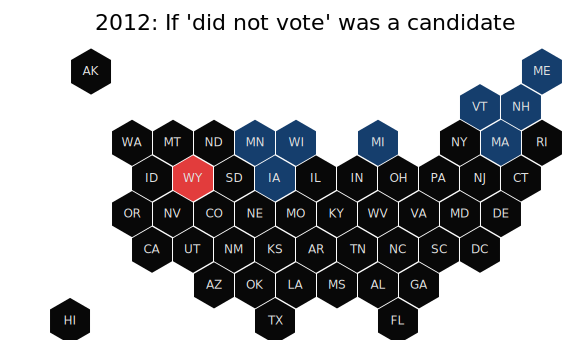

In [5]:
#2016
#if did not vote was a candidate

US = ['#153E6D','#E23C3C','#080808']

df = pd.read_csv('NV2P.csv')
mybin = Colorbin(df['NV2P2016'], US, proportional=True,decimals=None)

mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5,'#e0e0e0', '#101010')



states = list(df.ABV)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels



cm = Chorogrid('usa_states.csv', states, colors_by_state)
cm.draw_hex(x_column='althex_x', y_column='althex_y', spacing_dict={'margin_right': 1},
           font_colors=font_colors_by_state)
cm.set_title("2016: If 'did not vote' was a candidate", font_dict={'font-size': 22})
cm.draw_hex(spacing_dict={'margin_right': 1}, font_colors=font_colors_by_state)
cm.done(show=True)

#2012

US = ['#153E6D','#E23C3C','#080808']

df = pd.read_csv('NV2P.csv')
mybin = Colorbin(df['candidate'], US, proportional=True,decimals=None)

mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5,'#e0e0e0', '#101010')



states = list(df.ABV)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels



cq = Chorogrid('usa_states.csv', states, colors_by_state)
cq.draw_hex(x_column='althex_x', y_column='althex_y', spacing_dict={'margin_right': 1},
           font_colors=font_colors_by_state)
cq.set_title("2012: If 'did not vote' was a candidate", font_dict={'font-size': 22})
cq.draw_hex(spacing_dict={'margin_right': 1}, font_colors=font_colors_by_state)
cq.done(show=True)

# Part B: Countywise results and Analysis 

## Reading  and Plotting County  Shape Files

In [6]:
# Reading county shapefile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.io.shapereader as shpreader
import shapely.geometry
import shapely.ops
import cartopy
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
import cartopy.io.shapereader as shpreader
import shapely
import math
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import scipy as sp

#../data/cascadia.npz'
fname = 'cb_2015_us_county_500k.shx'
cc =shpreader.Reader(fname)
#shape_feature = cartopy.feature.ShapelyFeature(shpreader.Reader(fname).geometries(),cartopy.crs.PlateCarree(), facecolor='none')

pp=cc.records()
c1=cc.geometries()

for j in pp:
    pass

j.attributes

{'AFFGEOID': '0500000US48011',
 'ALAND': 2354581764,
 'AWATER': 12219587,
 'COUNTYFP': '011',
 'COUNTYNS': '01383791',
 'GEOID': '48011',
 'LSAD': '06',
 'NAME': 'Armstrong',
 'STATEFP': '48'}

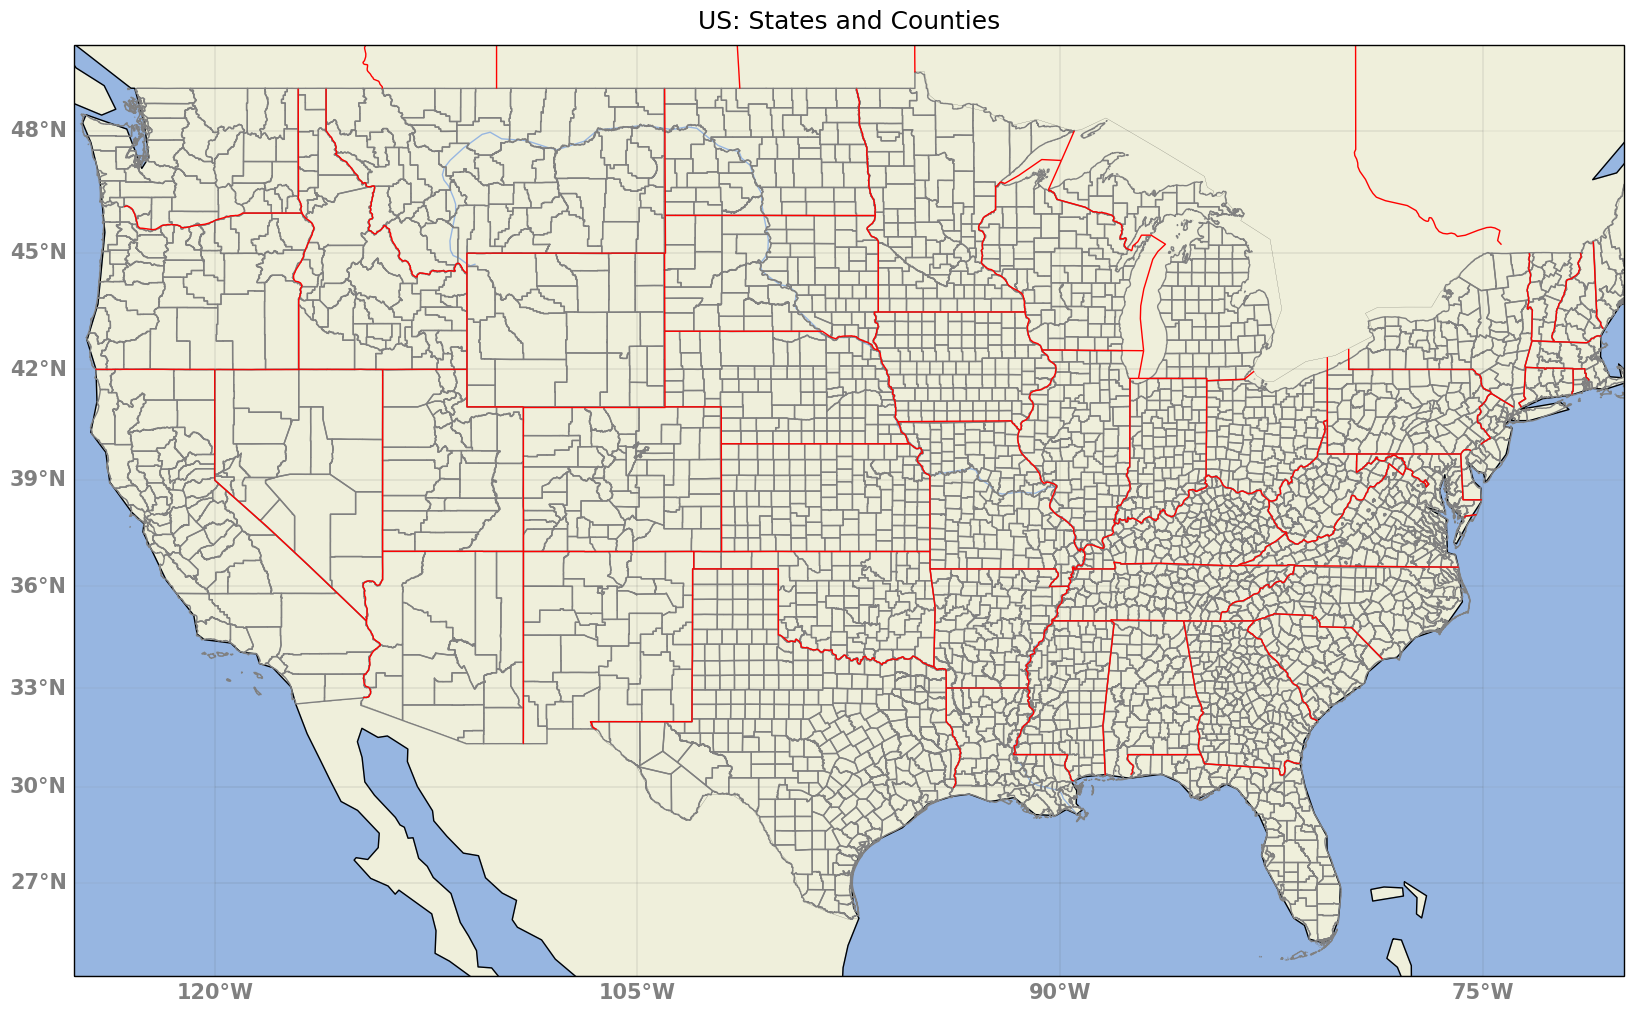

In [7]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
import cartopy.io.shapereader as shpreader
import shapely
import math
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Setting up the projection and plotting the map
fig=plt.figure(figsize=(20, 20))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.Mercator())
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=False)
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-125, -70, 24, 50], cartopy.crs.PlateCarree())
# add geographic information
fname = '..Users\ritvik\Desktop\Tamu lcture notes\OCNG608\cb_2015_us_county_500k/cb_2015_us_county_500k.shp'
counties11= cartopy.feature.ShapelyFeature(cc.geometries(),cartopy.crs.PlateCarree(), facecolor='none')

states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')






ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_lines_shp')

#gridline formatting
grid1=ax.gridlines(linewidth=0.2, color='black', alpha=0.2, linestyle='-', draw_labels=True)
ax.add_feature(counties11, edgecolor='grey') # Plots counties on the map
ax.add_feature(states, edgecolor='red')# plots states on the map
grid1.xlocator = matplotlib.ticker.FixedLocator([-120, -105, -90, -75])    
grid1.xformatter = LONGITUDE_FORMATTER
grid1.yformatter = LATITUDE_FORMATTER 
grid1.xlabels_top = False  # turn off labels where you don't want them
grid1.ylabels_right = False
grid1.xlabel_style = {'size': 15, 'color': 'gray','weight': 'bold'}  # control how the tick labels look
grid1.ylabel_style = {'size': 15,'color': 'gray', 'weight': 'bold'}
ax.set_title('US: States and Counties',y=1.01,fontsize=18)  




### Plotting Countywise -Leads 

Leads Results are plotted for each county. Leads results were used because the final conty- results were unavialable. 
Red counties represent Republican, Blue Democrats and grey counties are regions where the results have not yet come in.

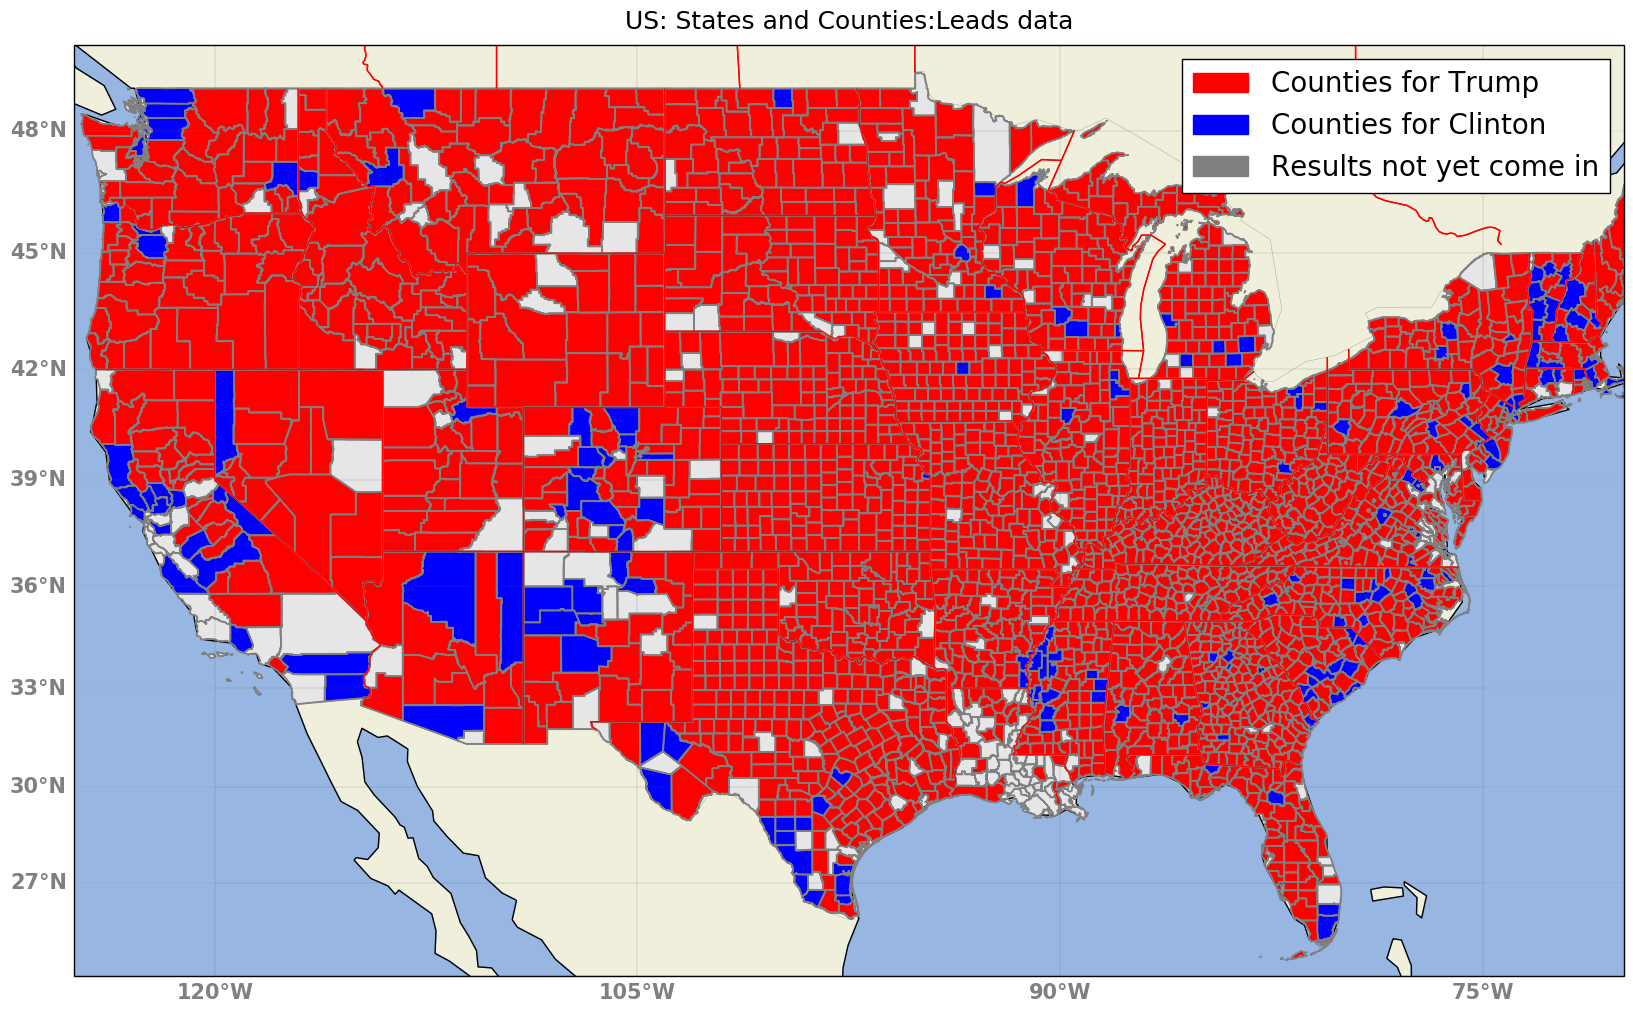

In [8]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
import cartopy.io.shapereader as shpreader
import shapely
import math
import pandas as pd
import numpy as np


# Setting up the projection and plotting the map
fig=plt.figure(figsize=(20, 20))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.Mercator())
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=False)
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-125, -70, 24, 50], cartopy.crs.PlateCarree())
# add geographic information
fname = '..Users\ritvik\Desktop\Tamu lcture notes\OCNG608\cb_2015_us_county_500k/cb_2015_us_county_500k.shp'
counties11= cartopy.feature.ShapelyFeature(cc.geometries(),cartopy.crs.PlateCarree(), facecolor='none')

states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')






ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_lines_shp')
ax.add_feature(counties11, edgecolor='grey') # Plots counties on the map
ax.add_feature(states, edgecolor='red')# plots states on the map


df = pd.read_csv('pres16results.csv', header=0, sep=',',na_values='NA',na_filter=True,index_col=[0])#, header=0, parse_dates=[0, 2], index_col=[0])
#df.county.dropna()
t=[]
df_rep=df[df['lead']=='Donald Trump']
df_dem=df[df['lead']=='Hillary Clinton']
#df_others=df[df['cand']!='Hillary Clinton' or df['cand']!='Donald Trump' ]


republican2=[]
democrats2=[]
df_rep.index 
for j in df_rep.index:
    j=str(j)
    if 'County' in j:      
        j=j.partition(' ')[0]
        republican2.append(j)
    else:
        republican2.append(j)


df_dem.index 
for j in df_dem.index:
    j=str(j)
    if 'County' in j:      
        j=j.partition(' ')[0]
        democrats2.append(j)
    else:
         democrats2.append(j)

for i in cc.records():
    facecolor =  [0.9,0.9,0.9]
    edgecolor = 'black'
    if i.attributes['NAME'] in republican2:
        #print('*****')
        facecolor='red'
    elif i.attributes['NAME'] in democrats2:
        #print('*****')
        facecolor='blue' 

        
    #ax.add_geometries([state.geometry], cartopy.crs.PlateCarree(), facecolor=facecolor, edgecolor=edgecolor)
    ax.add_geometries([i.geometry], cartopy.crs.PlateCarree(), edgecolor='grey',facecolor=facecolor) # Plots counties on the map


        
     
#gridline formatting
grid1=ax.gridlines(linewidth=0.2, color='black', alpha=0.2, linestyle='-', draw_labels=True)
ax.add_feature(counties11, edgecolor='grey') # Plots counties on the map
ax.add_feature(states, edgecolor='red')# plots states on the map
grid1.xlocator = matplotlib.ticker.FixedLocator([-120, -105, -90, -75])    
grid1.xformatter = LONGITUDE_FORMATTER
grid1.yformatter = LATITUDE_FORMATTER 
grid1.xlabels_top = False  # turn off labels where you don't want them
grid1.ylabels_right = False
grid1.xlabel_style = {'size': 15, 'color': 'gray','weight': 'bold'}  # control how the tick labels look
grid1.ylabel_style = {'size': 15,'color': 'gray', 'weight': 'bold'}
ax.set_title('US: States and Counties:Leads data',y=1.01,fontsize=18)  

   
#Create a Legend
red_patch = mpatches.Patch(color='red', label='Counties for Trump')
blue_patch = mpatches.Patch(color='blue', label='Counties for Clinton')
grey_patch = mpatches.Patch(color='grey', label='Results not yet come in')
plt.legend(handles=[red_patch,blue_patch,grey_patch],fontsize=20)
plt.show()





    


## Analysis for Michigan

### Michigan:Countywise Results

counties for michigan are imported on the map using county shape files, and the election results are plotted. Results taken from NY times.

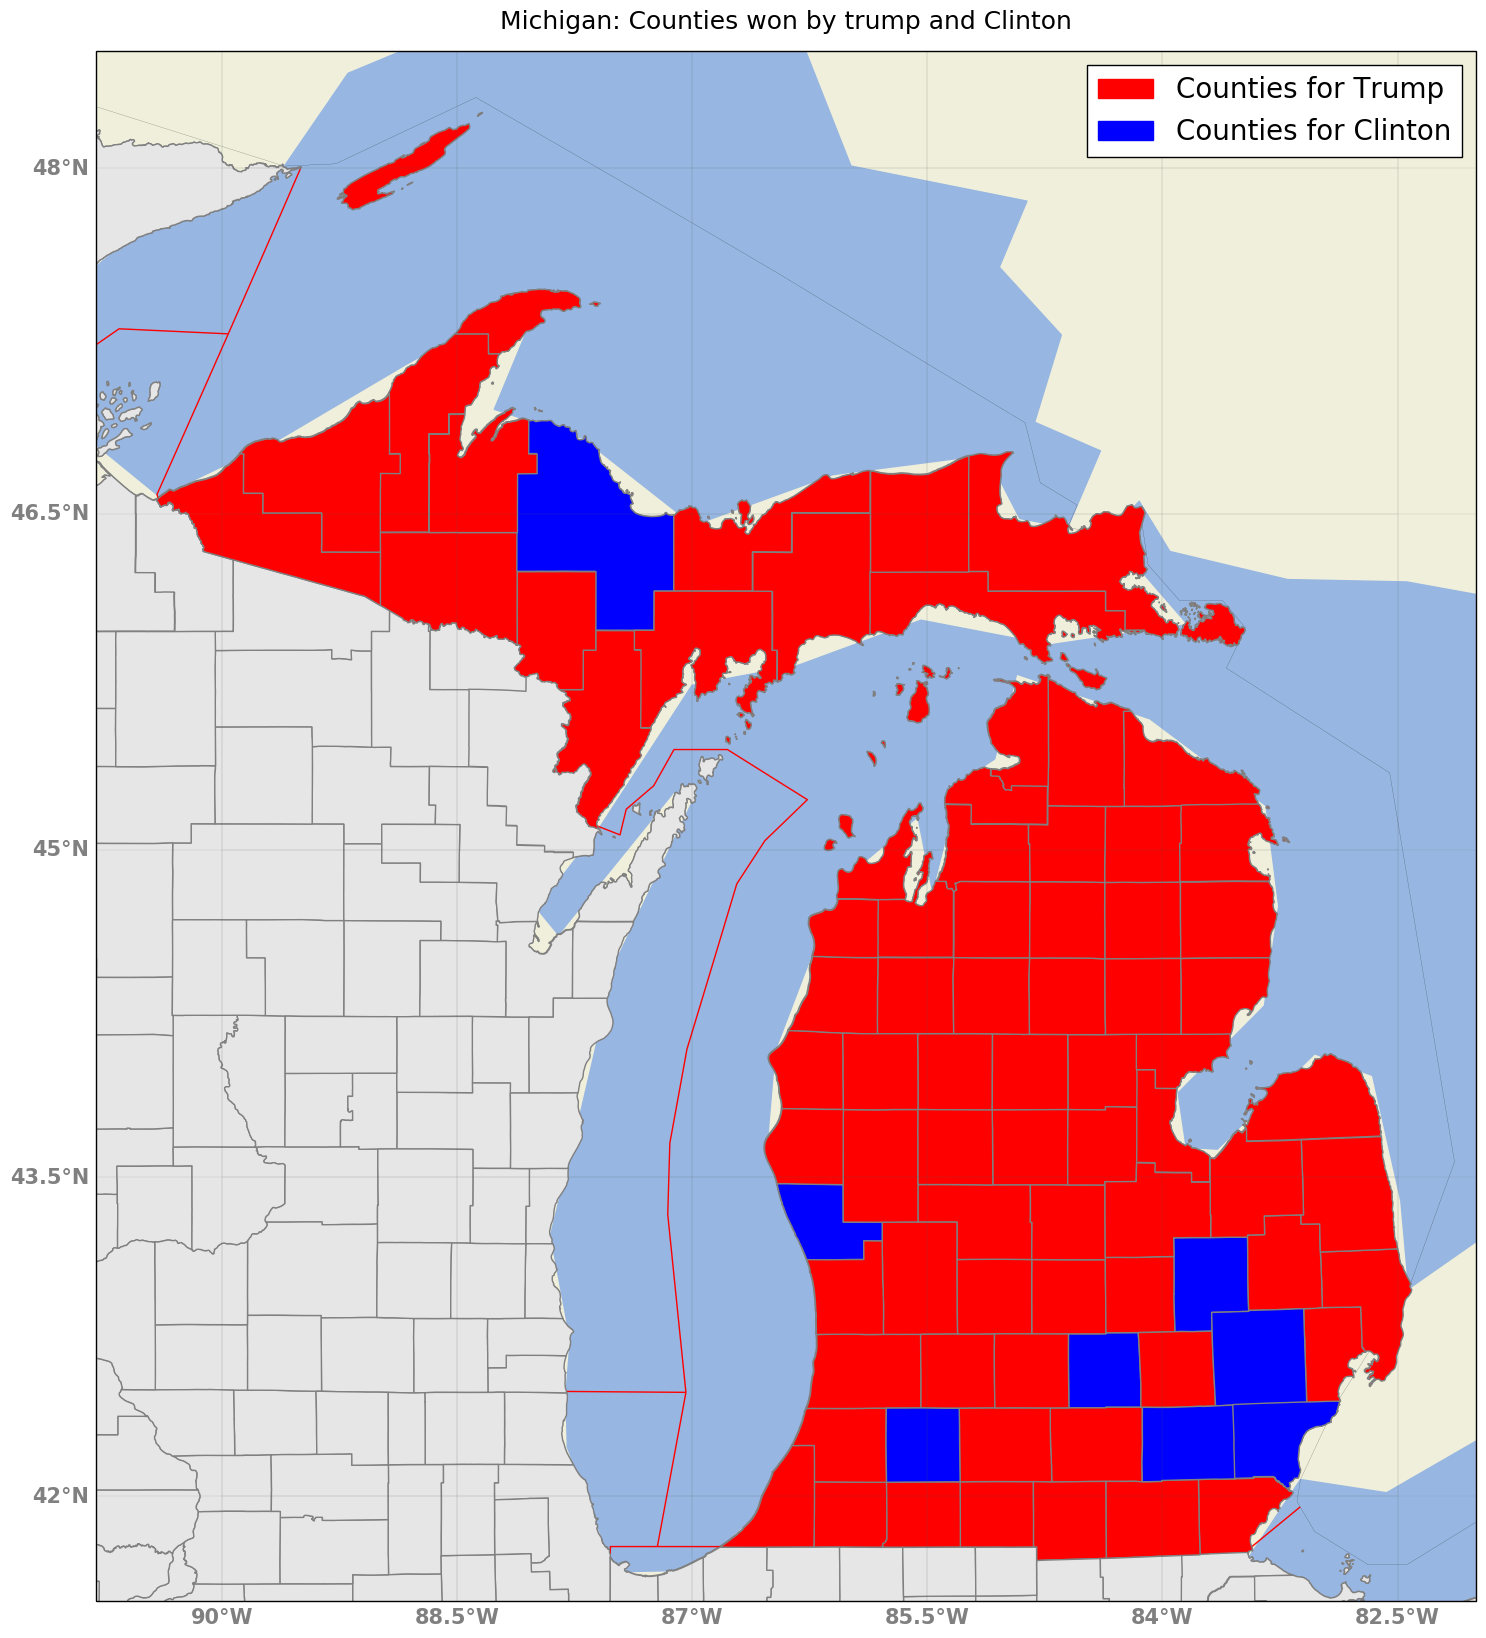

In [9]:
import matplotlib
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Setting up the projection and plotting the map
fig=plt.figure(figsize=(20, 20))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.Mercator())
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=False)
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-82, -90.8, 41.5, 48.5], cartopy.crs.PlateCarree())
# add geographic information
fname = '..Users\ritvik\Desktop\Tamu lcture notes\OCNG608\cb_2015_us_county_500k/cb_2015_us_county_500k.shp'
counties11= cartopy.feature.ShapelyFeature(cc.geometries(),cartopy.crs.PlateCarree(), facecolor='none')

states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',name='admin_1_states_provinces_shp')



ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_lines_shp')
ax.add_feature(counties11, edgecolor='grey') # Plots counties on the map
ax.add_feature(states, edgecolor='red')# plots states on the map

#Reading in the election results file -----------------------------------------------------------------------------------

dfm = pd.read_csv('Michigan3.csv',sep=';',header=0,index_col=[0])#, header=0, parse_dates=[0, 2], index_col=[0])
republicans=[]
democrats=[]
rep=dfm[dfm['Trump Voteshare']>50.0]
dem=dfm[dfm['Trump Voteshare']<50.0]

for i in cc.records():
    facecolor =  [0.9,0.9,0.9]
    edgecolor = 'black'
    if i.attributes['STATEFP']=='26':
        if i.attributes['NAME'] in rep.index:
            #print('*****')
            facecolor='red'
        elif i.attributes['NAME'] in dem.index:
            #print('----')
            facecolor='blue'
        if i.attributes['NAME'] == 'Muskegon':
            facecolor = 'blue'
        
  
        
    ax.add_geometries([i.geometry], cartopy.crs.PlateCarree(), edgecolor='grey',facecolor=facecolor) # Plots counties on the map

grid1=ax.gridlines(linewidth=0.2, color='black', alpha=0.2, linestyle='-', draw_labels=True)
grid1.xlocator = matplotlib.ticker.FixedLocator([-90, -88.5, -87, -85.5, -84,-82.5])      

grid1.xformatter = LONGITUDE_FORMATTER
grid1.yformatter = LATITUDE_FORMATTER
    
grid1.xlabel_style = {'size': 15, 'color': 'gray','weight': 'bold'}  # control how the tick labels look
grid1.ylabel_style = {'size': 15,'color': 'gray', 'weight': 'bold'}
grid1.xlabels_top = False  # turn off labels where you don't want them
grid1.ylabels_right = False    
ax.set_title('Michigan: Counties won by trump and Clinton',y=1.01,fontsize=18)
#Create a Legend
red_patch = mpatches.Patch(color='red', label='Counties for Trump')

#plt.legend(handles=[red_patch])

blue_patch = mpatches.Patch(color='blue', label='Counties for Clinton')
plt.legend(handles=[red_patch,blue_patch],fontsize=20)
plt.show()



### Michigan:Plotting Voteshare for Trump

 Trump Voteshare is plotted for each county. Colors are assigned to the county according to the percentage voteshare recieved by
by Trump in that county. 

Voteshare = % Votes for Trump/(Votes for Trump + Votes for Clinton)

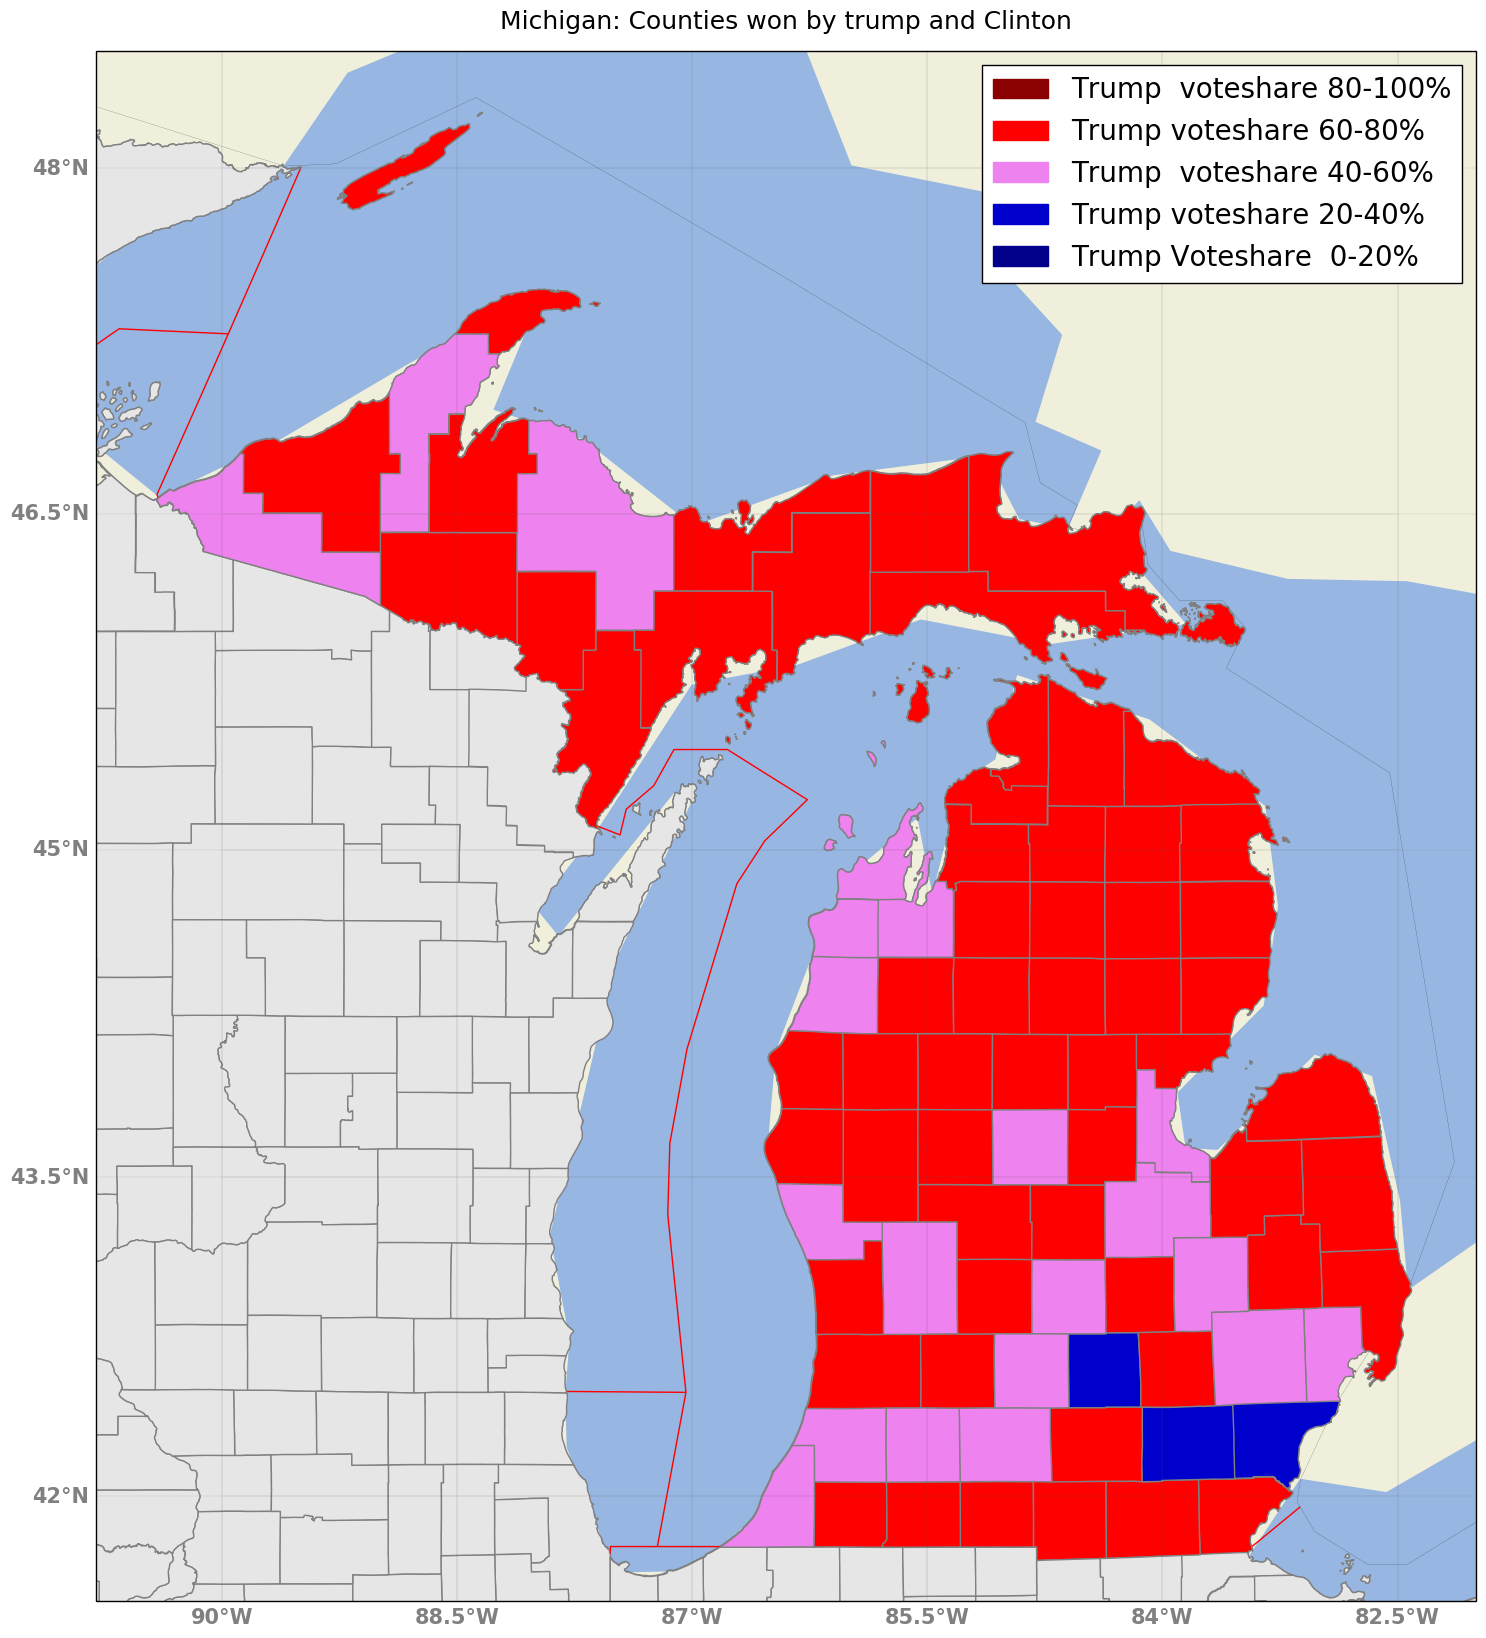

In [10]:
import matplotlib
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Setting up the projection and plotting the map
fig=plt.figure(figsize=(20, 20))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.Mercator())
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=False)
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-82, -90.8, 41.5, 48.5], cartopy.crs.PlateCarree())
# add geographic information
fname = '..Users\ritvik\Desktop\Tamu lcture notes\OCNG608\cb_2015_us_county_500k/cb_2015_us_county_500k.shp'
counties11= cartopy.feature.ShapelyFeature(cc.geometries(),cartopy.crs.PlateCarree(), facecolor='none')

states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',name='admin_1_states_provinces_shp')



ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_lines_shp')
ax.add_feature(counties11, edgecolor='grey') # Plots counties on the map
ax.add_feature(states, edgecolor='red')# plots states on the map

#Reading in the election results file -----------------------------------------------------------------------------------

dfm = pd.read_csv('Michigan3.csv',sep=';',header=0,index_col=[0])#, header=0, parse_dates=[0, 2], index_col=[0])
dfm
republicans=[]
democrats=[]
rep=dfm[dfm['Trump Voteshare']>50.0]
dem=dfm[dfm['Trump Voteshare']<50.0]

for i in cc.records():
    facecolor =  [0.9,0.9,0.9]
    edgecolor = 'black'
    if i.attributes['STATEFP']=='26':
        if 0<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=20:
            facecolor='darkblue'
        if 20<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=40:
            facecolor='mediumblue' 
        if 40<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=60:
            facecolor='violet' 
        if 60<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=80:
            facecolor='red' 
        if 80<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=100:
            facecolor='darkred' 
        
        
#         if i.attributes['NAME'] in rep.index:
#             #print('*****')
#             facecolor='red'
#         elif i.attributes['NAME'] in dem.index:
#             #print('----')
#             facecolor='blue' 
        
  
        
    ax.add_geometries([i.geometry], cartopy.crs.PlateCarree(), edgecolor='grey',facecolor=facecolor) # Plots counties on the map

grid1=ax.gridlines(linewidth=0.2, color='black', alpha=0.2, linestyle='-', draw_labels=True)
grid1.xlocator = matplotlib.ticker.FixedLocator([-90, -88.5, -87, -85.5, -84,-82.5])      

grid1.xformatter = LONGITUDE_FORMATTER
grid1.yformatter = LATITUDE_FORMATTER
    
grid1.xlabel_style = {'size': 15, 'color': 'gray','weight': 'bold'}  # control how the tick labels look
grid1.ylabel_style = {'size': 15,'color': 'gray', 'weight': 'bold'}
grid1.xlabels_top = False  # turn off labels where you don't want them
grid1.ylabels_right = False    
ax.ylabels_right = False
ax.xlabels_top = False 
ax.ylabels_left = False
ax.xlabels_bottom = False
ax.set_title('Michigan: Counties won by trump and Clinton',y=1.01,fontsize=18)
#Create a Legend
#plt.legend(handles=[red_patch])
darkred_patch = mpatches.Patch(color='darkred', label='Trump  voteshare 80-100%')
red_patch = mpatches.Patch(color='red', label='Trump voteshare 60-80%')
violet_patch = mpatches.Patch(color='violet', label='Trump  voteshare 40-60%')
mediumblue_patch = mpatches.Patch(color='mediumblue', label='Trump voteshare 20-40%')
darkblue_patch = mpatches.Patch(color='darkblue', label='Trump Voteshare  0-20%')
plt.legend(handles=[darkred_patch,red_patch,violet_patch,mediumblue_patch,darkblue_patch],fontsize=20)
plt.show()



### Michigan: plotting per capita income for each county

the per capita income for michigan is taken from the 2010 United States Census Data and the 2006-2010 American Community Survey 
5-Year Estimates. Counties are colored according to thier average per capita income

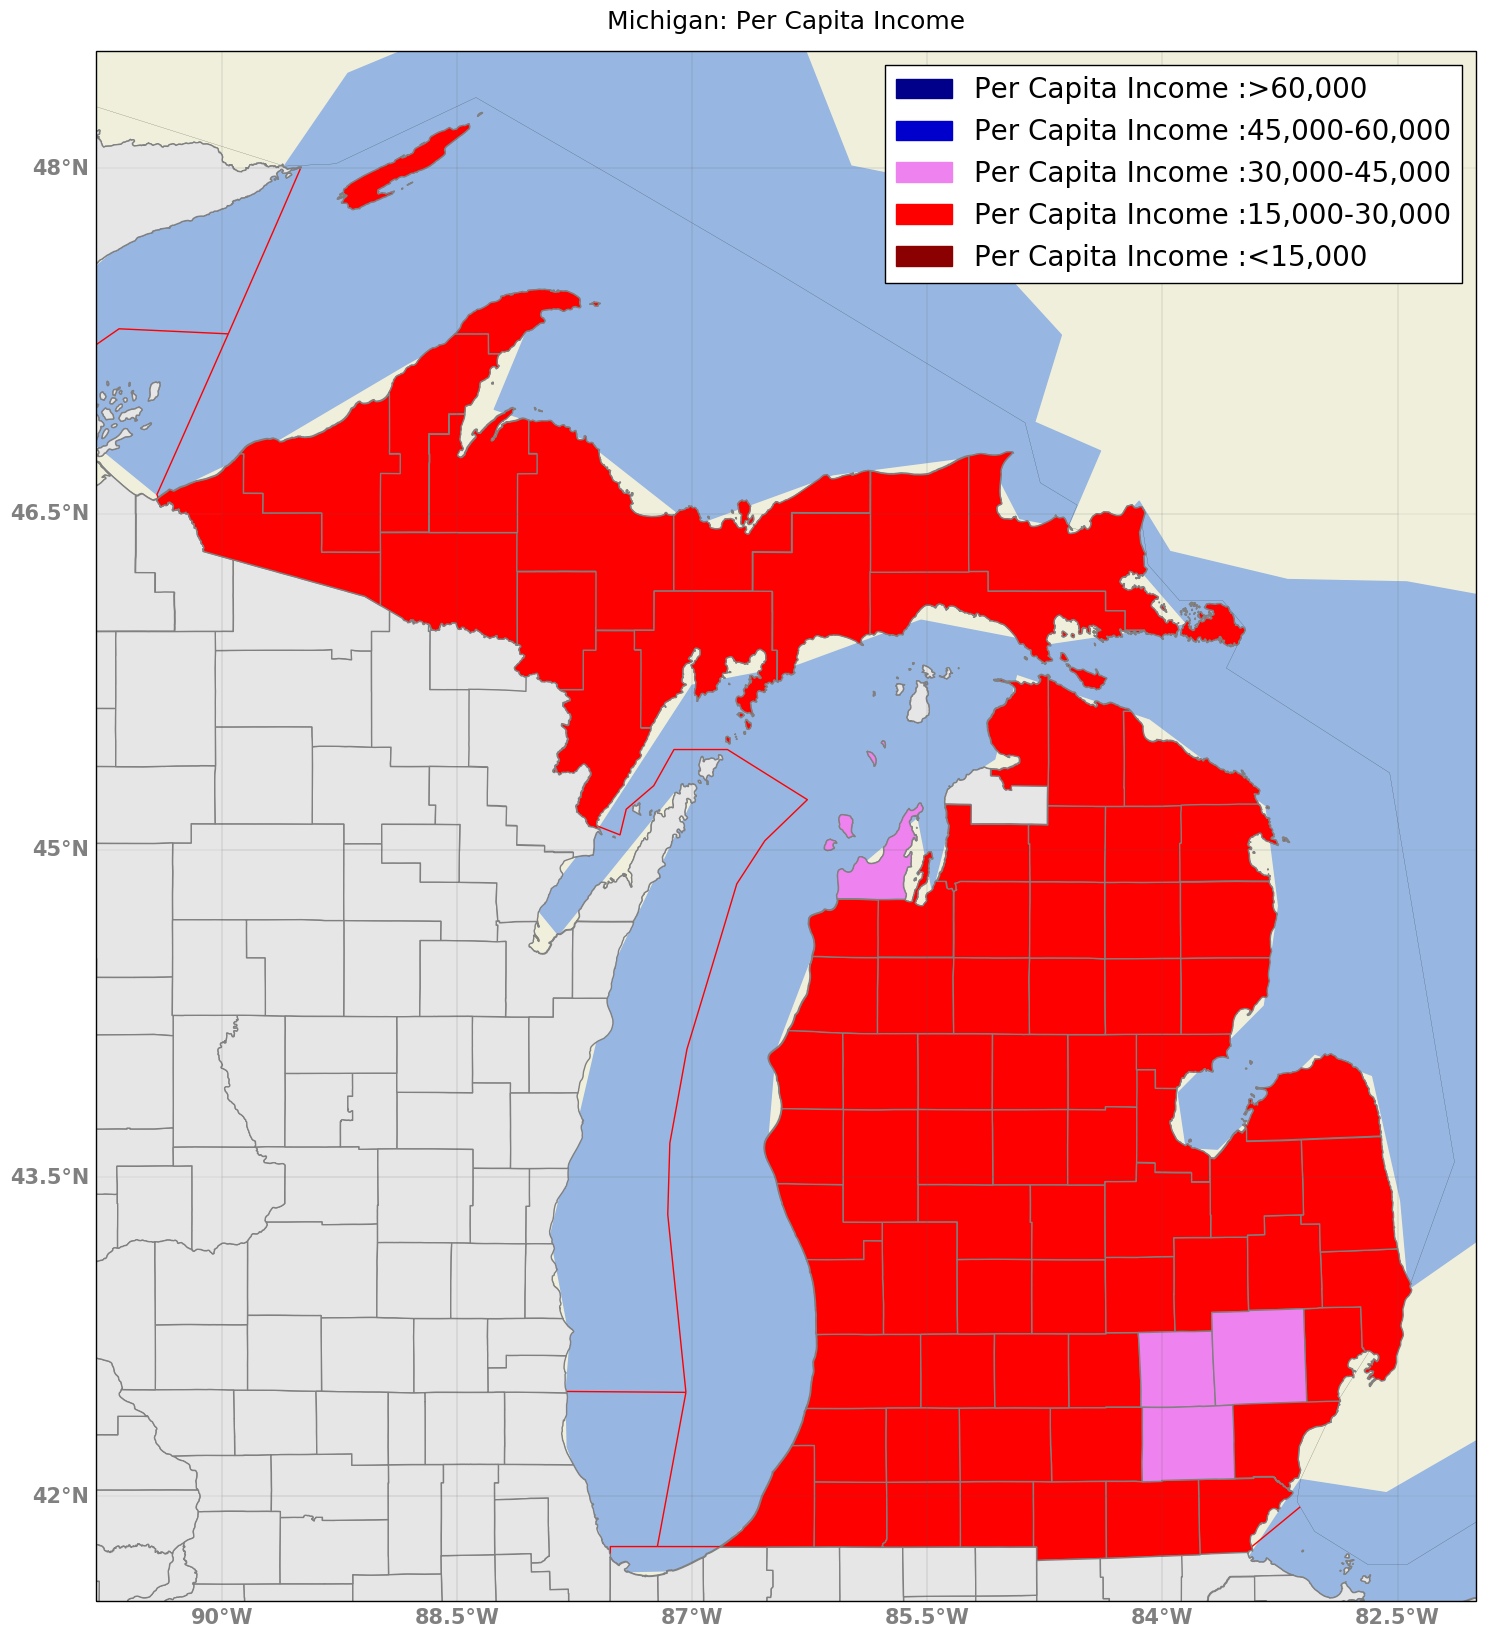

In [11]:
import matplotlib
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



# Setting up the projection and plotting the map
fig=plt.figure(figsize=(20, 20))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.Mercator())
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=False)
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-82, -90.8, 41.5, 48.5], cartopy.crs.PlateCarree())
# add geographic information
fname = '..Users\ritvik\Desktop\Tamu lcture notes\OCNG608\cb_2015_us_county_500k/cb_2015_us_county_500k.shp'
counties11= cartopy.feature.ShapelyFeature(cc.geometries(),cartopy.crs.PlateCarree(), facecolor='none')

states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',name='admin_1_states_provinces_shp')



ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_lines_shp')
ax.add_feature(counties11, edgecolor='grey') # Plots counties on the map
ax.add_feature(states, edgecolor='red')# plots states on the map

#Reading in the election results file -----------------------------------------------------------------------------------

dfm = pd.read_csv('Michigan income data.csv',sep=';',header=0,index_col=[0],skiprows=[5])#, header=0, parse_dates=[0, 2], index_col=[0])

for i in cc.records():
    facecolor =  [0.9,0.9,0.9]
    edgecolor = 'black'
    if i.attributes['STATEFP']=='26':
        if i.attributes['NAME']!='Charlevoix':
            if float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])>60000:
                facecolor='darkblue'
            if 45000<=float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])<=60000:
                facecolor='mediumblue' 
            if 30000<=float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])<=45000:
                facecolor='violet' 
            if 15000<=float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])<=30000:
                facecolor='red' 
            if 0<=float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])<=15000:
                facecolor='darkred' 
        
  
        
    ax.add_geometries([i.geometry], cartopy.crs.PlateCarree(), edgecolor='grey',facecolor=facecolor) # Plots counties on the map

grid1=ax.gridlines(linewidth=0.2, color='black', alpha=0.2, linestyle='-', draw_labels=True)
grid1.xlocator = matplotlib.ticker.FixedLocator([-90, -88.5, -87, -85.5, -84,-82.5])      

grid1.xformatter = LONGITUDE_FORMATTER
grid1.yformatter = LATITUDE_FORMATTER
    
grid1.xlabel_style = {'size': 15, 'color': 'gray','weight': 'bold'}  # control how the tick labels look
grid1.ylabel_style = {'size': 15,'color': 'gray', 'weight': 'bold'}
grid1.xlabels_top = False  # turn off labels where you don't want them
grid1.ylabels_right = False    
ax.ylabels_right = False
ax.xlabels_top = False 
ax.ylabels_left = False
ax.xlabels_bottom = False
ax.set_title('Michigan: Per Capita Income',y=1.01,fontsize=18)
#Create a Legend
#plt.legend(handles=[red_patch])

darkblue_patch = mpatches.Patch(color='darkblue', label='Per Capita Income :>60,000')
mediumblue_patch = mpatches.Patch(color='mediumblue', label='Per Capita Income :45,000-60,000')
violet_patch = mpatches.Patch(color='violet', label='Per Capita Income :30,000-45,000')
red_patch = mpatches.Patch(color='red', label='Per Capita Income :15,000-30,000')
darkred_patch = mpatches.Patch(color='darkred', label='Per Capita Income :<15,000')
plt.legend(handles=[darkblue_patch,mediumblue_patch,violet_patch,red_patch,darkred_patch],fontsize=20)
plt.show()



### Michigan: Performing Regression of Trump Voteshare vs Per capita income

A linear regression of Trump voteshare vs Per Capita income is performed to investigate any relationships between the two using seaborn

y= -0.00170384983166 * x+ 99.9205883634
r^2= 0.439420395837 p-value: 6.45698740497e-12


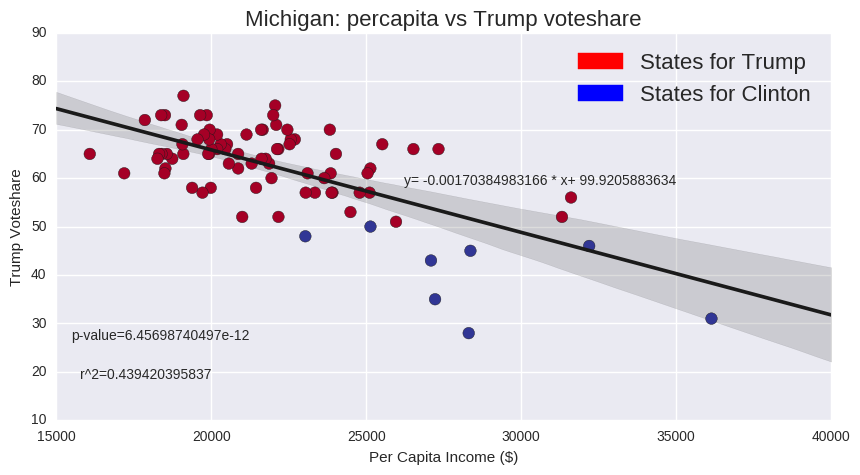

In [12]:
import scipy
import scipy.stats
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
df1 = pd.read_csv('Michigan3.csv',sep=';',header=0,index_col=[0])#, header=0, parse_dates=[0, 2], index_col=[0])
df2 = pd.read_csv('Michigan income data.csv',sep=';',header=0,index_col=[0],skiprows=[5])#, header=0, parse_dates=[0, 2], index_col=[0])

percapita=list(df2['Per capita'])
vshare=list(df1['Trump Voteshare'])
vshare.append(65)
colors=[]
for j in vshare:
    if j>50.0:
        colors.append(0)
    else:
        colors.append(1)
    
    
    
# Create linear regression object
slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(percapita,vshare)
line1=slope*np.array(percapita)+intercept
print('y=',slope,'*','x+',intercept)
print('r^2=',r_value**2,'p-value:',p_value)
equation='-0.00170384983166 * x+ 99.9205883634'
pvalue=p_value
rsq=r_value**2

#Seaborn Plotting

fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
tips = df1['Trump Voteshare']
y=pd.Series(vshare,name='Trump Voteshare')
x=pd.Series(percapita, name = 'Per Capita Income ($)')
#c=pd.series(colors,name = 'c')
ax = sns.regplot(x,y,ci=95,color='0.1',scatter=True)
#ax = sns.regplot(x,y,ci=95,color='0.1',scatter_kws={'c':df['c'], 'cmap':'RdYlBu'})

ax.scatter(percapita,vshare,cmap='RdYlBu',s=70,c=colors)
ax.text(0.8,0.6, r'y= -0.00170384983166 * x+ 99.9205883634', fontsize=10,verticalalignment='bottom',horizontalalignment='right',
         transform=ax.transAxes)
ax.text(0.25,0.2,'p-value=6.45698740497e-12', fontsize=10,verticalalignment='bottom',horizontalalignment='right',
         transform=ax.transAxes)
ax.text(0.2,0.1,'r^2=0.439420395837', fontsize=10,verticalalignment='bottom',horizontalalignment='right',
         transform=ax.transAxes)
ax.set_title('Michigan: percapita vs Trump voteshare',fontsize=16)
red_patch = mpatches.Patch(color='red', label='States for Trump')
blue_patch = mpatches.Patch(color='blue', label='States for Clinton')
plt.legend(handles=[red_patch,blue_patch],fontsize=16)
plt.show()


## Analysis for Pennsylvania

### Pennsylvania: Countywise Results

Counties taken by Democrats and Republicans are Presented

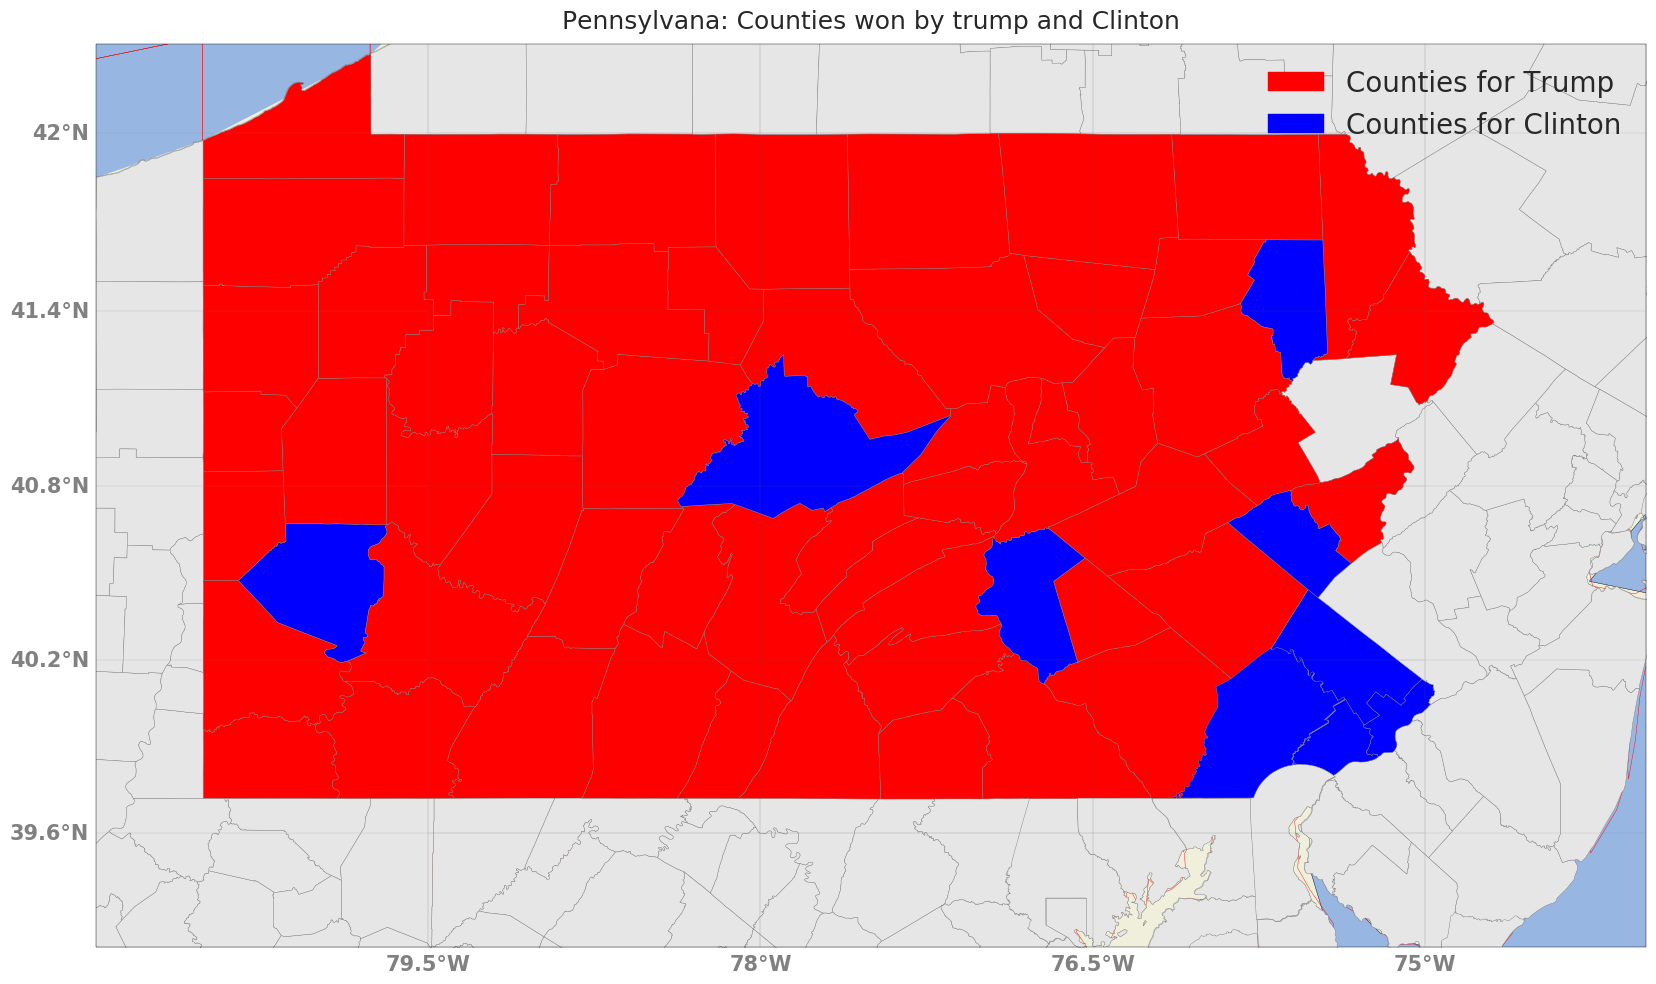

In [13]:

# Setting up the projection and plotting the map
fig=plt.figure(figsize=(20, 20))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.Mercator())
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=False)
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-74, -81, 39.2, 42.3], cartopy.crs.PlateCarree())
# add geographic information
fname = '..Users\ritvik\Desktop\Tamu lcture notes\OCNG608\cb_2015_us_county_500k/cb_2015_us_county_500k.shp'
counties11= cartopy.feature.ShapelyFeature(cc.geometries(),cartopy.crs.PlateCarree(), facecolor='none')

states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',name='admin_1_states_provinces_shp')



ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)

ax.add_feature(counties11, edgecolor='grey') # Plots counties on the map
ax.add_feature(states, edgecolor='red')# plots states on the map

#Reading in the election results file -----------------------------------------------------------------------------------

dfm = pd.read_csv('Pensylvania.csv',sep=';',header=0,index_col=[0])#, header=0, parse_dates=[0, 2], index_col=[0])
dfm
republicans=[]
democrats=[]
rep=dfm[dfm['Trump Voteshare']>50.0]
dem=dfm[dfm['Trump Voteshare']<50.0]

for i in cc.records():
    facecolor =  [0.9,0.9,0.9]
    edgecolor = 'black'
    if i.attributes['STATEFP']=='42':
        if i.attributes['NAME'] in rep.index:
            #print('*****')
            facecolor='red'
        elif i.attributes['NAME'] in dem.index:
            #print('----')
            facecolor='blue' 
        
  
        
    ax.add_geometries([i.geometry], cartopy.crs.PlateCarree(), edgecolor='grey',facecolor=facecolor) # Plots counties on the map

states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',edgecolor='red',
                             name='admin_1_states_provinces_lines_shp')

grid1=ax.gridlines(linewidth=0.2, color='black', alpha=0.2, linestyle='-', draw_labels=True)
grid1.xlocator = matplotlib.ticker.FixedLocator([-79.5, -78, -76.5, -75])      

grid1.xformatter = LONGITUDE_FORMATTER
grid1.yformatter = LATITUDE_FORMATTER
    
grid1.xlabel_style = {'size': 15, 'color': 'gray','weight': 'bold'}  # control how the tick labels look
grid1.ylabel_style = {'size': 15,'color': 'gray', 'weight': 'bold'}
grid1.xlabels_top = False  # turn off labels where you don't want them
grid1.ylabels_right = False



ax.set_title('Pennsylvana: Counties won by trump and Clinton',y=1.01,fontsize=18)
#Create a Legend
red_patch = mpatches.Patch(color='red', label='Counties for Trump')
#plt.legend(handles=[red_patch])

blue_patch = mpatches.Patch(color='blue', label='Counties for Clinton')
plt.legend(handles=[red_patch,blue_patch],fontsize=20)
plt.show()



## Pennsylvania: Trumps Voteshare for each county

 The counties of Pennsylvania are colored according to Trumps Voteshare

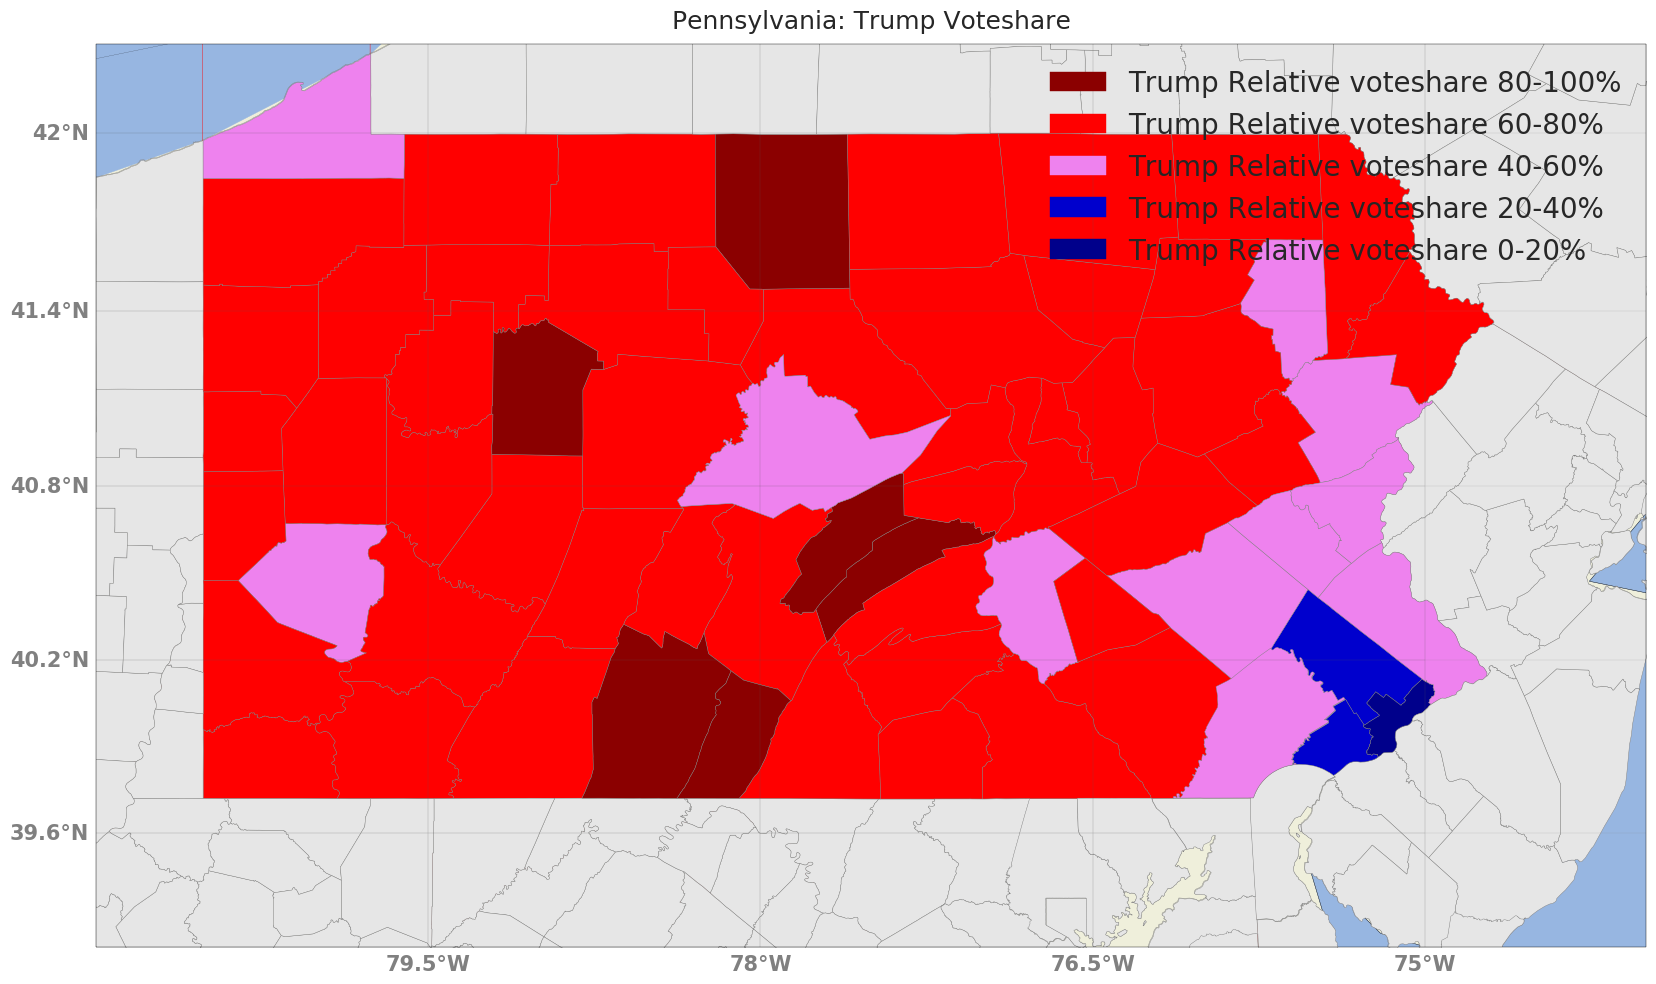

In [14]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
import cartopy.io.shapereader as shpreader
import shapely
import math
import pandas as pd
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



# Setting up the projection and plotting the map
fig=plt.figure(figsize=(20, 20))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.Mercator())
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=False)
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-74, -81, 39.2, 42.3], cartopy.crs.PlateCarree())
# add geographic information
fname = '..Users\ritvik\Desktop\Tamu lcture notes\OCNG608\cb_2015_us_county_500k/cb_2015_us_county_500k.shp'
counties11= cartopy.feature.ShapelyFeature(cc.geometries(),cartopy.crs.PlateCarree(), facecolor='none')

states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',name='admin_1_states_provinces_shp')



ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_lines_shp')
ax.add_feature(counties11, edgecolor='grey') # Plots counties on the map
ax.add_feature(states, edgecolor='red')# plots states on the map

#Reading in the election results file -----------------------------------------------------------------------------------

dfm = pd.read_csv('Pensylvania.csv',sep=';',header=0,index_col=[0])#, header=0, parse_dates=[0, 2], index_col=[0])
dfm
republicans=[]
democrats=[]
rep=dfm[dfm['Trump Voteshare']>50.0]
dem=dfm[dfm['Trump Voteshare']<50.0]


for i in cc.records():
    facecolor =  [0.9,0.9,0.9]
    edgecolor = 'black'
    if i.attributes['STATEFP']=='42':
        if 0<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=20:
            facecolor='darkblue'
        if 20<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=40:
            facecolor='mediumblue' 
        if 40<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=60:
            facecolor='violet' 
        if 60<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=80:
            facecolor='red' 
        if 80<=int(dfm[dfm.index==i.attributes['NAME']]['Trump Voteshare'])<=100:
            facecolor='darkred' 
        
        
#         if i.attributes['NAME'] in rep.index:
#             #print('*****')
#             facecolor='red'
#         elif i.attributes['NAME'] in dem.index:
#             #print('----')
#             facecolor='blue' 
        
  
        
    ax.add_geometries([i.geometry], cartopy.crs.PlateCarree(), edgecolor='grey',facecolor=facecolor) # Plots counties on the map
# Plotting format
grid1=ax.gridlines(linewidth=0.2, color='black', alpha=0.2, linestyle='-', draw_labels=True)
grid1.xlocator = matplotlib.ticker.FixedLocator([-79.5, -78, -87, -76.5, -75])      

grid1.xformatter = LONGITUDE_FORMATTER
grid1.yformatter = LATITUDE_FORMATTER
    
grid1.xlabel_style = {'size': 15, 'color': 'gray','weight': 'bold'}  # control how the tick labels look
grid1.ylabel_style = {'size': 15,'color': 'gray', 'weight': 'bold'}
grid1.xlabels_top = False  # turn off labels where you don't want them
grid1.ylabels_right = False    

ax.ylabels_right = False
ax.xlabels_top = False 
ax.ylabels_left = False
ax.xlabels_bottom = False
ax.set_title('Pennsylvania: Trump Voteshare',y=1.01,fontsize=18)

#Create a Legend
#plt.legend(handles=[red_patch])
darkred_patch = mpatches.Patch(color='darkred', label='Trump Relative voteshare 80-100%')
red_patch = mpatches.Patch(color='red', label='Trump Relative voteshare 60-80%')
violet_patch = mpatches.Patch(color='violet', label='Trump Relative voteshare 40-60%')
mediumblue_patch = mpatches.Patch(color='mediumblue', label='Trump Relative voteshare 20-40%')
darkblue_patch = mpatches.Patch(color='darkblue', label='Trump Relative voteshare 0-20%')
plt.legend(handles=[darkred_patch,red_patch,violet_patch,mediumblue_patch,darkblue_patch],fontsize=20)
plt.show()



### Pennsylvania: Plotting per capita income for each county

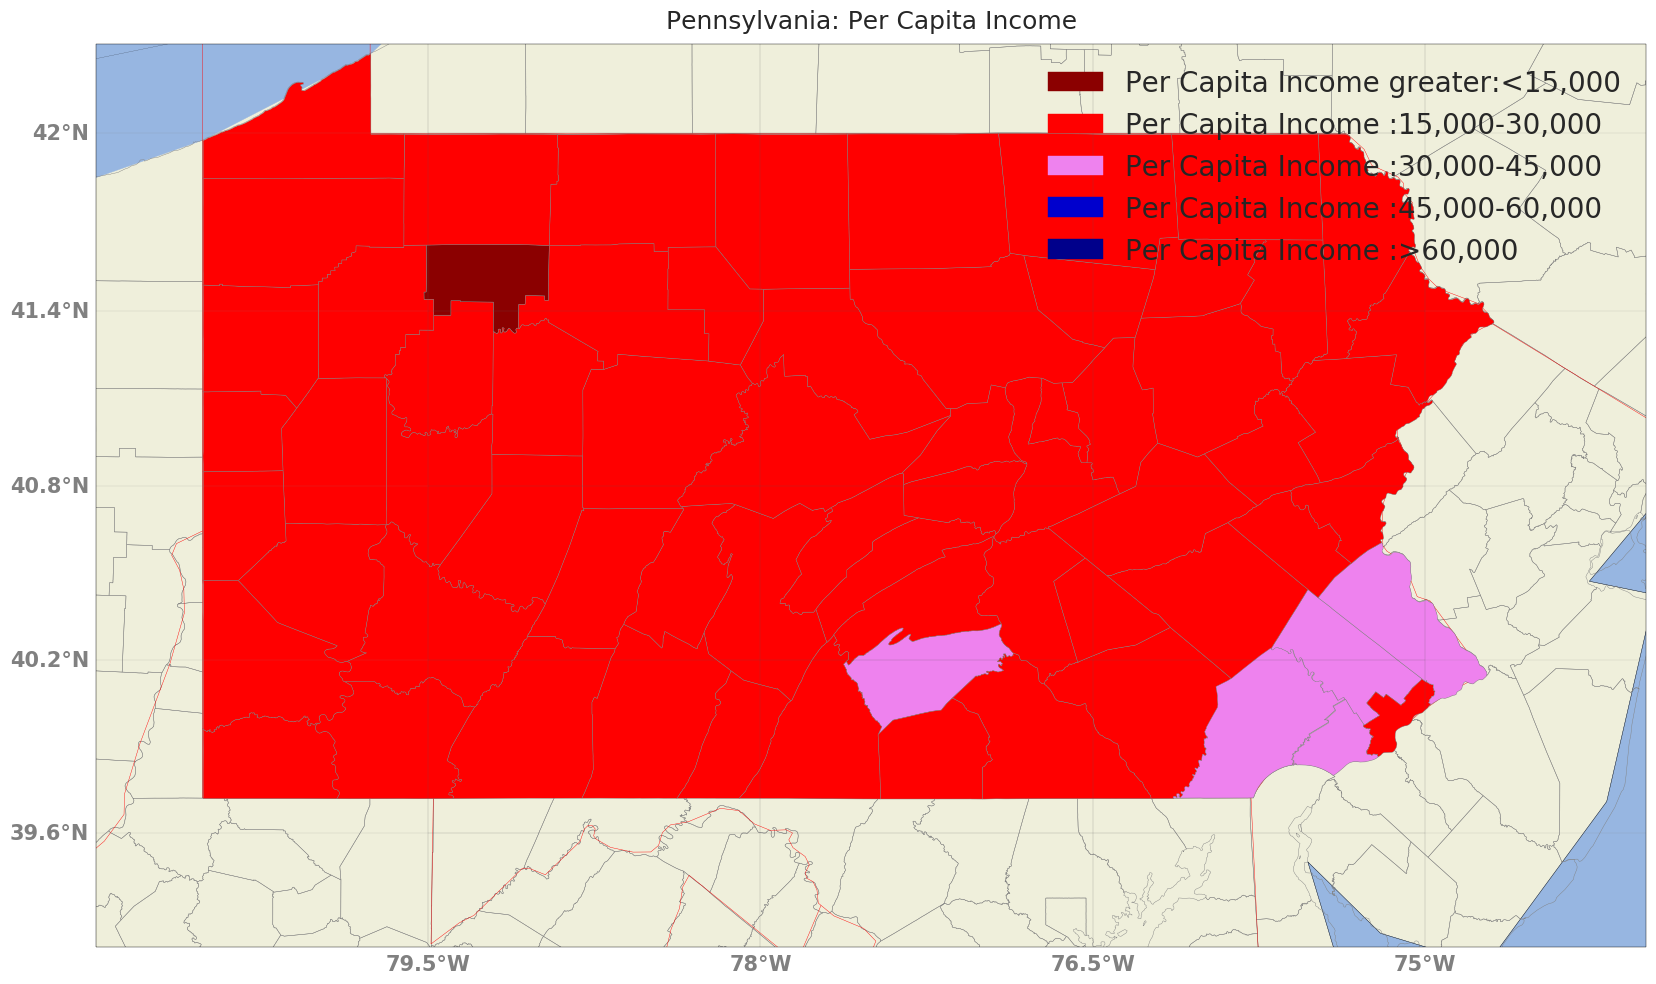

In [19]:
# YOUR CODE HERE
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
import cartopy.io.shapereader as shpreader
import shapely
import math
import pandas as pd
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# Setting up the projection and plotting the map
fig=plt.figure(figsize=(20, 20))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.Mercator())
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=False)
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-74, -81, 39.2, 42.3], cartopy.crs.PlateCarree())
# add geographic information
fname = '..Users\ritvik\Desktop\Tamu lcture notes\OCNG608\cb_2015_us_county_500k/cb_2015_us_county_500k.shp'
counties11= cartopy.feature.ShapelyFeature(cc.geometries(),cartopy.crs.PlateCarree(), facecolor='none')

states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',name='admin_1_states_provinces_shp')



ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_lines_shp')
ax.add_feature(counties11, edgecolor='grey') # Plots counties on the map
ax.add_feature(states, edgecolor='red')# plots states on the map

#Reading in the election results file -----------------------------------------------------------------------------------

dfm = pd.read_csv('Pensylvania income data.csv',sep=';',header=0,index_col=[0],skiprows=[5])#, header=0, parse_dates=[0, 2], index_col=[0])

for i in cc.records():
    facecolor =  [0.9,0.9,0.9]
    edgecolor = 'black'
    if i.attributes['STATEFP']=='42':
        if i.attributes['NAME']!='Cumberland':
            #print(i.attributes['NAME'])
            if float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])>60000:
                facecolor='darkblue'
            if 45000<=float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])<=60000:
                facecolor='mediumblue' 
            if 30000<=float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])<=45000:
                facecolor='violet' 
            if 15000<=float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])<=30000:
                facecolor='red' 
            if 0<=float(dfm[dfm.index==i.attributes['NAME']]['Per capita'])<=15000:
                facecolor='darkred' 
        if i.attributes['NAME']=='Cumberland':
            facecolor='violet'
        ax.add_geometries([i.geometry], cartopy.crs.PlateCarree(), edgecolor='grey',facecolor=facecolor) # Plots counties on the map

grid1=ax.gridlines(linewidth=0.2, color='black', alpha=0.2, linestyle='-', draw_labels=True)
grid1.xlocator = matplotlib.ticker.FixedLocator([-79.5, -78, -76.5, -75])      

grid1.xformatter = LONGITUDE_FORMATTER
grid1.yformatter = LATITUDE_FORMATTER
    
grid1.xlabel_style = {'size': 15, 'color': 'gray','weight': 'bold'}  # control how the tick labels look
grid1.ylabel_style = {'size': 15,'color': 'gray', 'weight': 'bold'}
grid1.xlabels_top = False  # turn off labels where you don't want them
grid1.ylabels_right = False    
ax.ylabels_right = False
ax.xlabels_top = False 
ax.ylabels_left = False
ax.xlabels_bottom = False
ax.set_title('Pennsylvania: Per Capita Income',y=1.01,fontsize=18)
#Create a Legend
#plt.legend(handles=[red_patch])
darkred_patch = mpatches.Patch(color='darkred', label='Per Capita Income greater:<15,000')
red_patch = mpatches.Patch(color='red', label='Per Capita Income :15,000-30,000')
violet_patch = mpatches.Patch(color='violet', label='Per Capita Income :30,000-45,000')
mediumblue_patch = mpatches.Patch(color='mediumblue', label='Per Capita Income :45,000-60,000')
darkblue_patch = mpatches.Patch(color='darkblue', label='Per Capita Income :>60,000')
plt.legend(handles=[darkred_patch,red_patch,violet_patch,mediumblue_patch,darkblue_patch],fontsize=20)
plt.show()



### Pennsylvania: Regressing Trump Voteshare with per capita income

y= -0.00224880111385 * x+ 119.289336423
r^2= 0.6539537067 p-value: 4.33743998111e-17


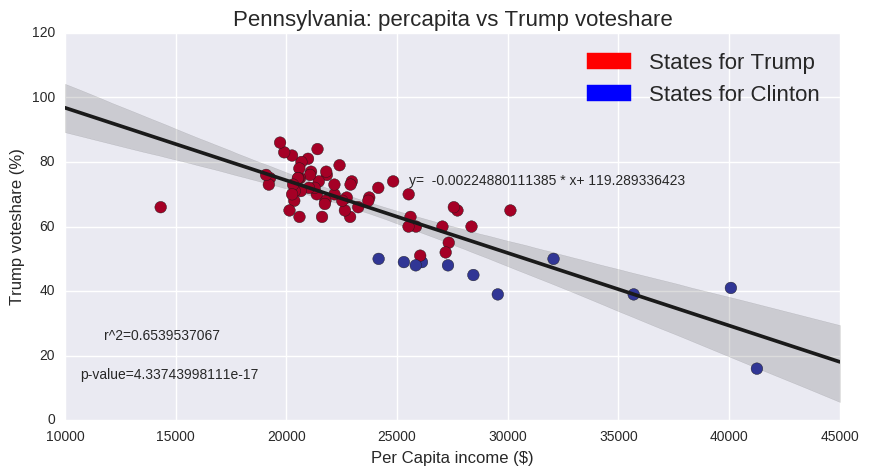

In [16]:
#Linear Regression
import scipy
import scipy.stats
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
df1 = pd.read_csv('Pensylvania.csv',sep=';',header=0,index_col=[0])#, header=0, parse_dates=[0, 2], index_col=[0])
df2 = pd.read_csv('Pensylvania income data.csv',sep=';',header=0,index_col=[0],skiprows=[5])#, header=0, parse_dates=[0, 2], index_col=[0])

#plt.scatter(list(df2['Per capita']),list(df1['Trump Voteshare']))
percapita=list(df2['Per capita'])
percapita.append(30119)
vshare=list(df1['Trump Voteshare'])
vshare.append(65)
colors=[]
vshare[67]=66.0 
for j in vshare:
    if j>50.0:
        colors.append(0)
    else:
        colors.append(1)
  


# Create linear regression object
slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(percapita,vshare)
#print(slope, intercept, r_value, p_value, std_err)
line1=slope*np.array(percapita)+intercept

print('y=',slope,'*','x+',intercept)
print('r^2=',r_value**2,'p-value:',p_value)
pvalue=p_value
rsq=r_value**2

#Seaborn plotting
fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
tips = df1['Trump Voteshare']
y=pd.Series(vshare,name='Trump Voteshare')
x=pd.Series(percapita, name = 'Per Capita Income ($)')
#c=pd.series(colors,name = 'c')
ax = sns.regplot(x,y,ci=95,color='0.1',scatter=True)
#ax = sns.regplot(x,y,ci=95,color='0.1',scatter_kws={'c':df['c'], 'cmap':'RdYlBu'})

ax.scatter(percapita,vshare,cmap='RdYlBu',s=70,c=colors)
ax.text(0.8,0.6, r'y=  -0.00224880111385 * x+ 119.289336423', fontsize=10,verticalalignment='bottom',horizontalalignment='right',
         transform=ax.transAxes)
ax.text(0.25,0.1,'p-value=4.33743998111e-17', fontsize=10,verticalalignment='bottom',horizontalalignment='right',
         transform=ax.transAxes)
ax.text(0.2,0.2,'r^2=0.6539537067', fontsize=10,verticalalignment='bottom',horizontalalignment='right',
         transform=ax.transAxes)
ax.set_title('Pennsylvania: percapita vs Trump voteshare',fontsize=16)
ax.set_ylabel('Trump voteshare (%)', fontsize=12)
ax.set_xlabel('Per Capita income ($)', fontsize=12)
red_patch = mpatches.Patch(color='red', label='States for Trump')
blue_patch = mpatches.Patch(color='blue', label='States for Clinton')
plt.legend(handles=[red_patch,blue_patch],fontsize=16)
plt.show()






y= -0.000779405645534 * x+ 92.3717294258
r^2= 0.298081966872 p-value: 3.41405533041e-05 std err 0.000170860178468


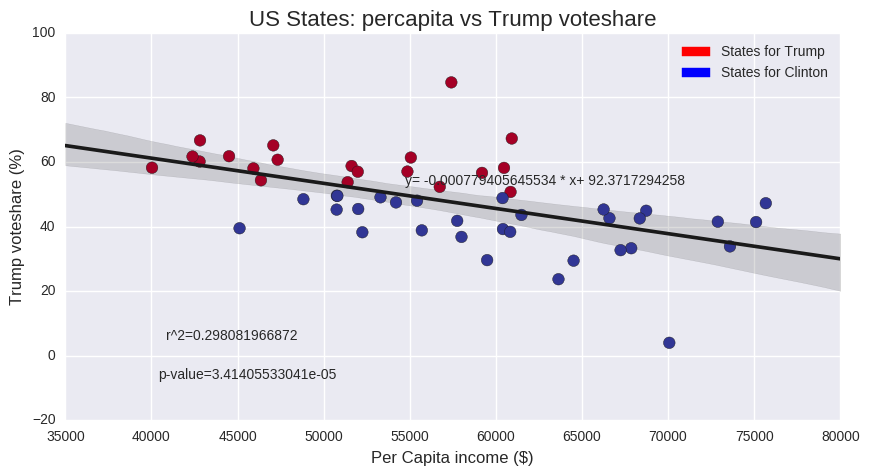

In [17]:
import scipy
import scipy.stats
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
df_i = pd.read_csv('FinalProj2.csv',sep=';',header=0,index_col=[0])#, header=0, parse_dates=[0, 2], index_col=[0])
percapita=list(df_i['Per capita'])
vshare=list(df_i['Trump Voteshare'])
colors=[]
for j in vshare:
    if j>50.0:
        colors.append(0)
    else:
        colors.append(1)

# Create linear regression object
slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(percapita,vshare)

#print(slope, intercept, r_value, p_value, std_err)
line1=slope*np.array(percapita)+intercept
print('y=',slope,'*','x+',intercept)
print('r^2=',r_value**2,'p-value:',p_value,'std err',std_err)

# Plotting regression in Seaborn

fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
tips = df1['Trump Voteshare']
y=pd.Series(vshare,name='Trump Voteshare')
x=pd.Series(percapita, name = 'Per Capita Income ($)')
#c=pd.series(colors,name = 'c')
ax = sns.regplot(x,y,ci=95,color='0.1',scatter=True)
#ax = sns.regplot(x,y,ci=95,color='0.1',scatter_kws={'c':df['c'], 'cmap':'RdYlBu'})

ax.scatter(percapita,vshare,cmap='RdYlBu',s=70,c=colors)
ax.text(0.8,0.6, r'y= -0.000779405645534 * x+ 92.3717294258', fontsize=10,verticalalignment='bottom',horizontalalignment='right',
         transform=ax.transAxes)
ax.text(0.35,0.1,'p-value=3.41405533041e-05', fontsize=10,verticalalignment='bottom',horizontalalignment='right',
         transform=ax.transAxes)
ax.text(0.3,0.2,'r^2=0.298081966872', fontsize=10,verticalalignment='bottom',horizontalalignment='right',
         transform=ax.transAxes)
ax.set_title('US States: percapita vs Trump voteshare',fontsize=16)
ax.set_ylabel('Trump voteshare (%)', fontsize=12)
ax.set_xlabel('Per Capita income ($)', fontsize=12)
red_patch = mpatches.Patch(color='red', label='States for Trump')
blue_patch = mpatches.Patch(color='blue', label='States for Clinton')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

# Conclusion

In [18]:
'''he results of the regressions conducted are as follows:-
	Regression                                       Slope            p-vaue          R^2
Trump Voteshare vs States Per capita	            -0.000779406	 3.41406E-05	  0.298081967
Trump Voteshare vs Michigan county Per capita	    -0.00170385	     6.45699E-12	  0.439420396
Trump Voteshare vs Pennsylvania county Per capita	-0.002248801	 4.34E-17	      0.653953707

 the p-values and R^2  show that there is a relationship between the Trump vteshare and per capita income.
However, we observe that there are some outliers.The problem may be arising due to a lack of normal distribution
in the residuals. We see that most of the data points for ths states  of Pennsylvania and Michigan are clustered at an 
income level of 18000-25000. In the scatter plots of Trump Voteshare vs income, a clear seperation is 
seen between the counties won by Clinton and those won by Trump for the states of michigan and Pennsylvania. 
More variables need to be incorporated into the regression to arrive at a more accurate understanding of the relationship.'''

'he results of the regressions conducted are as follows:-\n\tRegression                                       Slope            p-vaue          R^2\nTrump Voteshare vs States Per capita\t            -0.000779406\t 3.41406E-05\t  0.298081967\nTrump Voteshare vs Michigan county Per capita\t    -0.00170385\t     6.45699E-12\t  0.439420396\nTrump Voteshare vs Pennsylvania county Per capita\t-0.002248801\t 4.34E-17\t      0.653953707\n\n the p-values and R^2  show that there is a relationship between the Trump vteshare and per capita income.\nHowever, we observe that there are some outliers.The problem may be arising due to a lack of normal distribution\nin the residuals. We see that most of the data points for ths states  of Pennsylvania and Michigan are clustered at an \nincome level of 18000-25000. In the scatter plots of Trump Voteshare vs income, a clear seperation is \nseen between the counties won by Clinton and those won by Trump for the states of michigan and Pennsylvania. \nMore va

## References

County Election data : New York Times

Income data :  2010 United States Census Data and the 2006-2010 American Community Survey 5-Year Estimates.

## Python Packages used

Chorogrid, Pandas, numpy, Scipy, Matplotlib, Cartopy,Seaborn(Regression)
